In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
print("Null Values:")
print(data.isnull().sum())


Null Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [9]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

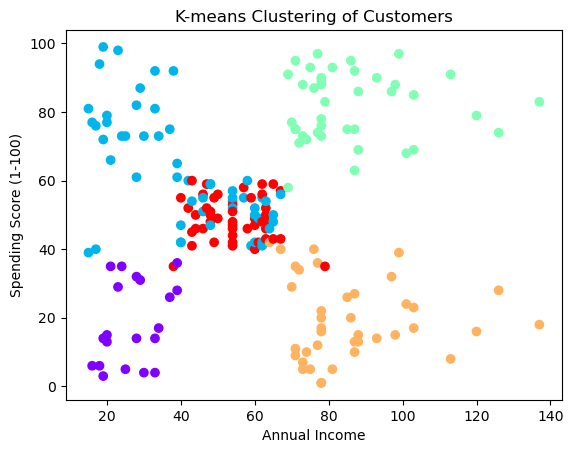

In [14]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Customers')
plt.show()


In [15]:
cluster_centers_scaled = kmeans.cluster_centers_
print("Cluster Centers (Scaled):")
print(cluster_centers_scaled)
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
print("Cluster Centers (Original):")
print(cluster_centers_original)


Cluster Centers (Scaled):
[[ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]]
Cluster Centers (Original):
[[46.25       26.75       18.35      ]
 [25.18518519 41.09259259 62.24074074]
 [32.875      86.1        81.525     ]
 [39.87179487 86.1025641  19.35897436]
 [55.63829787 54.38297872 48.85106383]]


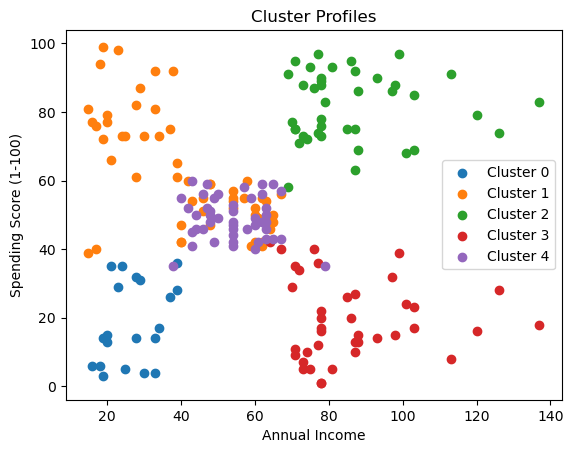

In [16]:
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_id}')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Profiles')
plt.legend()
plt.show()